In [1]:
# Created/updated by Amrit Chhetri, Digital Quantum Forensics Researcher . Orginal Codes from Program dj.py
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
import numpy as np
from qiskit.visualization import plot_histogram

#Options & Noise goes here - Don't change options variable name and block
options_without_noise = {
}

options_noise = {
    'plot': False,
    "thermal_factor": 1.0,
    "decoherence_factor": 1.0,
    "depolarization_factor": 1.0,
    "bell_depolarization_factor": 1.0,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1.0, 0.0], 'ry':[1.0, 0.0], 'rz': [1.0, 0.0]},
    "tsp_model_error": [1.0, 0.0]
}


In [2]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier()

circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

In [12]:
/'''
# Rectified below for DM Simulator, it is working
backend = BasicAer.get_backend('dm_simulator')
# Execution without noise
run = execute(circuit,backend,**options_without_noise)
result = run.result()
run_error = execute(circuit,backend,**options_noise)
result_error = run_error.result()
prob = result.results[0].data.partial_probability
prob_error = result_error.results[0].data.partial_probability

from qiskit.visualization import plot_histogram
plot_histogram([prob, prob_error], legend=['Without Noise', 'With Noise'])
'''

"()\n# Rectified below for DM Simulator\nbackend = BasicAer.get_backend('dm_simulator')\n# Execution without noise\nrun = execute(circuit,backend,**options_without_noise)\nresult = run.result()\nrun_error = execute(circuit,backend,**options_noise)\nresult_error = run_error.result()\nprob = result.results[0].data.partial_probability\nprob_error = result_error.results[0].data.partial_probability\n\nfrom qiskit.visualization import plot_histogram\nplot_histogram([prob, prob_error], legend=['Without Noise', 'With Noise'])\n"

In [18]:
                                ### Below Codes are not DM Simulator

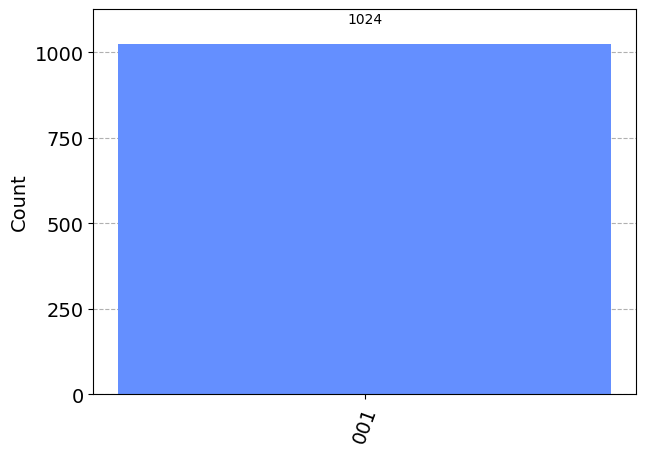

In [17]:
backend = BasicAer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(circuit, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(circuit)  
graph = plot_histogram(counts)
display(graph)

##                                Running on real Computer

In [28]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
# Load local account information using Token from 
IBMQ.save_account('421d274b036d601145cfa3f18287ff92d8cc3d9f4d8628e865b60d4495fc6bceb3586aed6b0abbae478f17e8ebb5b178ebf66c1bf362c81ef9396813385b5d9f', overwrite=True) 
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-06-05 18:14:52,552: Credentials are already in use. The existing account in the session will be replaced.


In [21]:
shots = 256
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("Least Busy, Best for Execution: ", backend)

job = execute(circuit, backend=backend, shots=shots)

Least Busy, Best for Execution:  ibm_nairobi


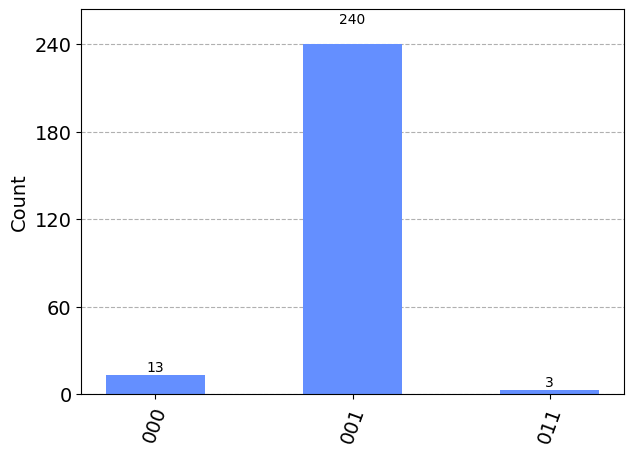

In [25]:
counts = job.result().get_counts(circuit)  
graph = plot_histogram(counts)
display(graph)